# IS 362 – Week 8 Assignment: Auto MPG Data Analysis

In this assignment, we will analyze the Auto MPG dataset to understand the distribution of variables and the relationships between them. 

**Tasks:**
1. Load and clean the data.
2. Perform exploratory data analysis (EDA).
3. Visualize distributions and relationships between variables.
4. Answer an additional question based on the data.


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request

# Set style for seaborn plots
sns.set(style="whitegrid")


In [17]:
# URL of the Auto MPG dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

# Download the dataset and save it locally as 'auto-mpg.data'
urllib.request.urlretrieve(url, "auto-mpg.data")

# Define the column names according to the dataset's documentation
columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']

# Load the dataset with proper whitespace handling
df = pd.read_csv('auto-mpg.data', sep=r'\s+', names=columns)

# Display the first few rows of the dataset
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


## Download and Load the Dataset

We download the Auto MPG dataset from the UC Irvine Machine Learning Repository and load it into a pandas DataFrame. The dataset uses whitespace as a delimiter, which we handle using `sep=r'\s+'`.


In [20]:
# Get an overview of the dataset
df.info()

# Check for unique values in 'horsepower' to identify any non-numeric values
print("Unique values in 'horsepower':", df['horsepower'].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
Unique values in 'horsepower': ['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' '?' '100.0' '105.0' '175.0' '153.0'
 '180.0' '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00'
 '80.00' '54.00' '208.0' '155.0' '112.0' 

## Data Overview and Initial Cleaning

We examine the dataset structure to understand its shape, data types, and any missing values or anomalies. The `horsepower` column, in particular, may contain non-numeric values (`?`), which we’ll need to clean.


In [25]:
# Replace '?' with NaN in the horsepower column
df['horsepower'] = df['horsepower'].replace('?', pd.NA)

# Convert horsepower to numeric (automatically handles NaNs)
df['horsepower'] = pd.to_numeric(df['horsepower'])

# Fill missing values in horsepower with the median of the column
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())



We replace any `?` values in the `horsepower` column with `NaN`, convert the column to numeric, and fill any remaining missing values with the median. This approach avoids chained assignment warnings by re-assigning the results to the column without using `inplace=True`.


## Convert Origin Column to Region Names

The `origin` column contains numeric codes representing regions (1 for USA, 2 for Europe, and 3 for Asia). We replace these codes with their corresponding region names for better readability.


In [28]:
# Map the origin codes to region names
df['origin'] = df['origin'].replace({1: 'USA', 2: 'Europe', 3: 'Asia'})

# Verify the unique values in the 'origin' column
df['origin'].unique()


array(['USA', 'Asia', 'Europe'], dtype=object)

## Distribution of Cylinders

This bar chart displays the distribution of cars by the number of cylinders, allowing us to see which configurations are most common in the dataset.


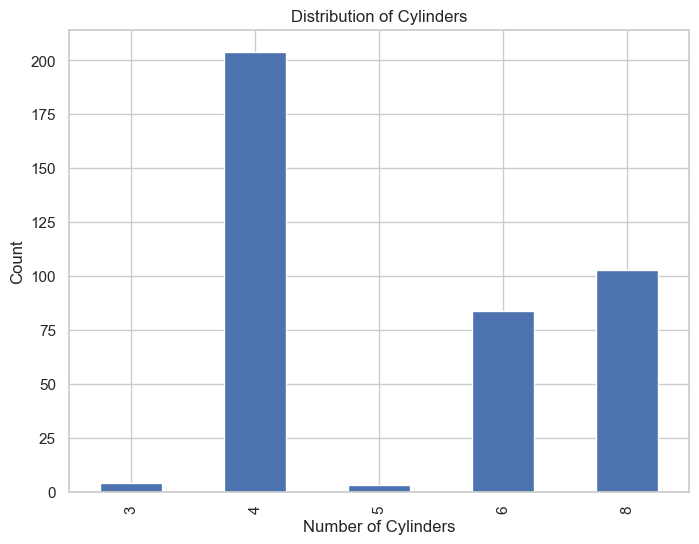

In [31]:
# Plot the distribution of cylinders
plt.figure(figsize=(8, 6))
df['cylinders'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Cylinders')
plt.xlabel('Number of Cylinders')
plt.ylabel('Count')
plt.show()


## Relationship Between Horsepower and Weight

This scatter plot shows the relationship between `weight` and `horsepower`, with points colored by the origin of the car. This helps us see if there are patterns or clusters based on origin.


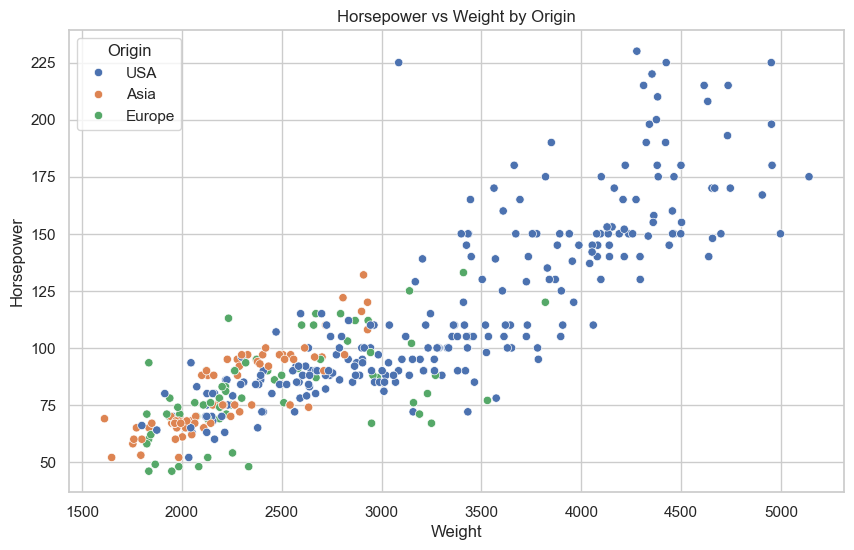

In [35]:
# Scatter plot for horsepower vs weight
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='weight', y='horsepower', hue='origin')
plt.title('Horsepower vs Weight by Origin')
plt.xlabel('Weight')
plt.ylabel('Horsepower')
plt.legend(title='Origin')
plt.show()


## Additional Analysis: Relationship Between Cylinders and Weight

This boxplot explores the relationship between the number of cylinders and the weight of the car. It helps us understand how weight varies with the number of cylinders.


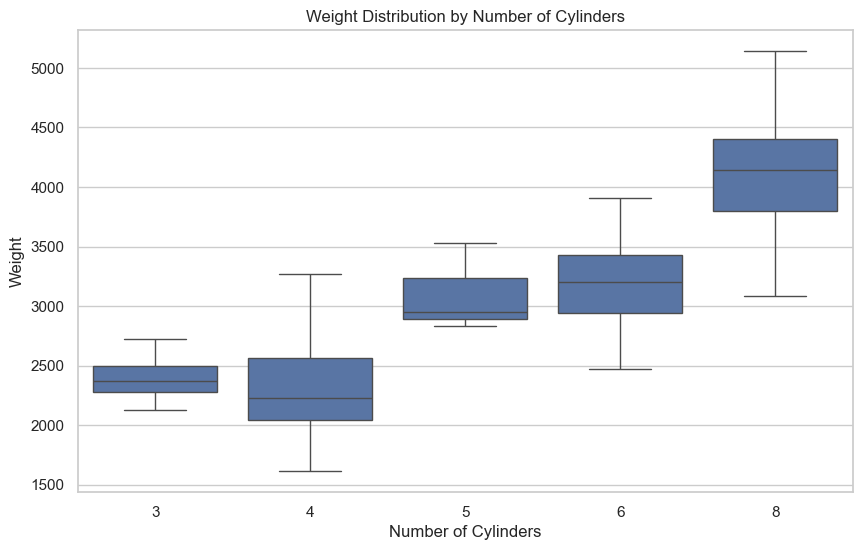

In [38]:
# Boxplot of weight by number of cylinders
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='cylinders', y='weight')
plt.title('Weight Distribution by Number of Cylinders')
plt.xlabel('Number of Cylinders')
plt.ylabel('Weight')
plt.show()


## Conclusion

In this analysis, we:
1. Downloaded and loaded the Auto MPG dataset.
2. Cleaned the data, particularly handling missing values in `horsepower`.
3. Converted the `origin` column from codes to region names.
4. Conducted exploratory data analysis, visualizing distributions and relationships between variables.

Key insights:
- Most cars have 4 or 8 cylinders.
- There is a positive relationship between `weight` and `horsepower`.
- Cars with more cylinders tend to weigh more.